# Bifurkace


```{admonition} Co se dozvíte v tomto textu
![](pics/rybarske_site.jpg)

V tomto textu se budeme věnovat vlivu parametrů na chování řešení diferenciální rovnice. Zvláštní pozornost bude věnována situacím, kdy může dojít ke jiným než plynulým změnám fázového portrétu, například zániku nebo ztrátě stability stacionárního bodu. 

Techniky sledující závislost řešení na parametrech jsou zásadním při managementu populací, zejména při návrhu trvale udržitelného lovu. Historicky byly nejprve rozpracovány pro rybolov, aby byl přehled o důsledcích lovu na život v oceánech.

Kromě základní metodiky a aplikací na lov populace se seznámíme i s problematikou redukce populace škůdce působením predátorů a následky, které mohou nastat při překročení hranice, při které se mění struktura stacionárních bodů modelu, jejich počet a stabilita.

*Foto: S bifurkacemi se setkáváme v situacích, kdy se podstatně mění chování systému. V praxi to může znamenat například zhroucení ekosystému, jak se několikrát stalo v případě nadměrného rybolovu. Na snímku rybářské sítě pro rybolov malého rozsahu. Anoop Negi, <https://www.flickr.com/photos/ezee123/117560929>*
```

Jak jsme viděli v předešlých modelech, v praxi naše modely obsahují parametry.
Tyto parametry ovlivňují chování modelu v několika ohledech. 

Zpravidla se stává, že malé změny parametrů mají malý vliv na chování řešení.
Ovlivní pouze polohu stacionárních stavů a rychlost konvergence řešení do těchto
bodů, ale při malé změně parametrů se zpravidla stacionární body posunují o malé
hodnoty a jejich počet i jejich stabilita zůstávají zachovávány. V zásadě se pro
všechny hodnoty parametru řešení chovají pořád stejně. To jsme viděli například
u diferenciální rovnice ochlazování 
$$\frac{\mathrm dT}{\mathrm dt}=-k(T-T_\infty).$$
Řešení ukazuje, že těleso se ochladí na teplotu okolí pro libovolnou kombinaci
konstanty úměrnosti $k$ a teploty okolí $T_\infty.$ Toto plyne i z faktu, že v
bezrozměrném tvaru rovnice ochlazování neobsahuje žádný parametr.

Někdy se však stane, že změna parametru při překročení nějaké hodnoty vyvolá
velkou změnu chování systému. Například zanikne nebo vznikne nový stacionární
bod, nebo se změní jeho stabilita. V takovém případě říkáme, že rovnice má v
daném bodě *bifurkaci*. Příslušná hodnota parametru se nazývá *bifurkační
hodnota*.

## Bifurkace v logistické diskrétní rovnici

Nejjednodušší je pozorovat bifurkaci na diskrétní obdobě logistické rovnice, na
rovnici 
$$x_{k+1} = rx_k(1-x_k)$$

Rovnice má pro malé $r$ stacionární bod a řešení konverguje podobně jako u
spojité logistické rovnice k nosné kapacitě prostředí. Pokud hodnotu $r$
zvyšujeme, stacionární bod se posunuje, ale jinak se nic neděje dokud
nepřekročíme jistý kritický bod. Za hodnotou $r=3$ už řešení přestává
konvergovat k jedné hodnotě, ale přeskakuje mezi dvěma hodnotami, má cyklus s
periodou 2. Při dalším zvyšování se jenom posunují body, mezi kterými řešení
osciluje, dokud se nedostaneme k další kritické hodnotě. Pro $r$ mezi přibližně
3.44949 a 3.54409 začne řešení periodicky přeskakovat mezi čtyřmi hodnotami a
jedná se tedy o cyklus s periodou 4. 

Pro hodnoty parametru $r$ použité v obrázcích se řešení buď ustálí na konstantní
hodnotě, nebo vznikne cyklus s periodou dva nebo cyklus s periodou čtyři. V
posledním případě dokonce vznikne zdánlivě chaotické chování, které je ve
skutečnosti cyklem s s dlouhou periodou.

In [1]:
import numpy as np  # knihovna pro numerické výpočty
import matplotlib.pyplot as plt  # knihovna pro grafiku
import pandas as pd # knihovna pro práci s tabulkami
from scipy.integrate import solve_ivp, cumulative_trapezoid

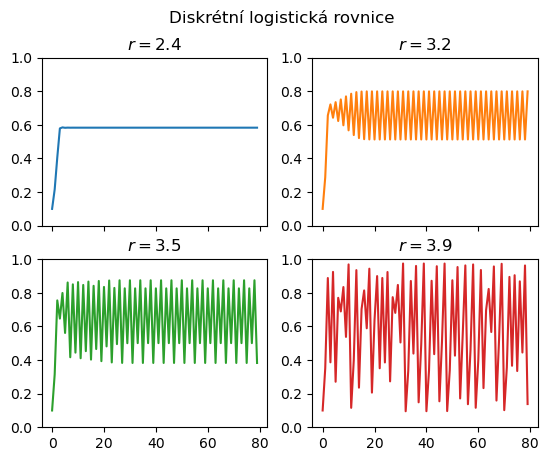

In [2]:
N = 80
r = np.array([2.4,3.2,3.5,3.9])

data = np.full((N,4),0.1)
for i in range(N-1):
    data[i+1] = r * data[i] * (1-data[i])
df = pd.DataFrame(data, columns=r)
ax = df.plot(
    subplots=True, 
    layout=(2,2),
    legend=False
    )
for a,j in zip(ax.flatten(),r):
    a.set(
        ylim=(0,1),
        title=(rf"$r={j}$")
        )
plt.suptitle("Diskrétní logistická rovnice");

Vidíme, že chování rovnice je velice pestré. Následující diagram je takzvaný
bifurkační diagram této rovnice. Na vodorovné ose je hodnota parametru. Pokud
parametru odpovídá jedna hodnota na svislé ose, řešení se ustálí na dané
hodnotě. Pokud více, řešení mezi těmito hodnotami přeskakuje v cyklu. V místě,
kde se křivka rozdvojuje se mění počet hodnot, mezi kterými řešení přeskakuje a
mění se tedy perioda cyklu, ke kterému řešení konverguje. V takovém bodě má
rovnice bifurkaci. 

Čím více průsečíků má graf se svislou přímkou, tím větší je perioda řešení a tím
chaotičtější je systém, protože se střídají řádově desítky či stovky hodnot.

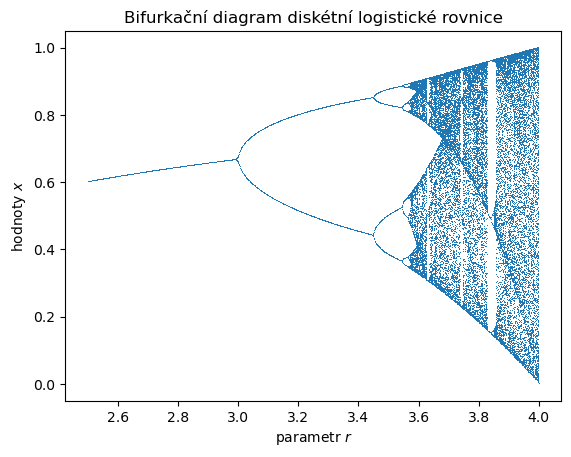

In [3]:
r_hodnoty = np.linspace(2.5, 4.0, 1000)
x0 = 0.5
N = 500
pocet = 100

def log_rce_tail(r):
    x = np.zeros(N)
    x[0] = x0
    for i in range(N-1):
        x[i+1]=(r * x[i] * (1 - x[i]))
    return x[-pocet:]

x_hodnoty = [log_rce_tail(r) for r in r_hodnoty]
    
plt.plot(r_hodnoty, x_hodnoty, ",", color="C0")

ax = plt.gca()
ax.set (
    xlabel='parametr $r$',
    ylabel='hodnoty $x$',
    title='Bifurkační diagram diskétní logistické rovnice'
);

## Logistický růst a dvě strategie lovu

Předpokládejme, že populace vyvíjející se podle logistické rovnice a populace je
vystavena lovu, odchytu či těžbě. Naším cílem je zjistit, jaké bude mít tento
lov důsledky na stav a vývoj populace. 

```{margin} Zhroucení lovišť

*(převzato z https://www.enviweb.cz/, autor Jaroslav Petr)*

![](pics/treska.jpg)
(zdroj: wikimedia.org, Lamiot)

Cenu, jakou za uspokojení rostoucí poptávky po "darech moře" platíme, názorně dokumentuje osud tresky. Jedno z historicky nejbohatších lovišť ve vodách u kanadského Newfoundlandu dnes zeje prázdnotou. Odedávna sem připlouvaly rybářské flotily a jen málokdy se vracely s prázdnou.
V sezóně tu bývalo tolik lodí, že Rudyard Kipling mohl bez uzardění mezi jejich posádkami spřádat dramatické nitky svého románu "Stateční kapitáni". Koncem osmdesátých let minulého století začali biologové bít na poplach. Stavy tresek povážlivě klesaly a jejich hejnům hrozil kolaps. *"Rybolov u Newfoundlandu se musí zastavit! Teď hned!"* volali oceánologové. Rybáři vyděšení hrozbou ztráty živobytí se bouřili a kanadská vláda pod jejich tlakem otálela se zákazem lovu u Newfoundlandu až do roku 1992. To už bylo pozdě. Chmurné vize vědců se naplnily. Celá populace newfoundlandské tresky se zhroutila. Rybáři tak o své zaměstnání stejně přišli a Newfoundland postihla hluboká krize. Celá oblast se vylidnila. Lidé odtud houfně prchali v zoufalé snaze najít práci. Ceny nemovitostí fatálně poklesly, protože všichni chtěli pryč a nikdo se sem nestěhoval. Jen malá část rybářů se tu udržela tím, že změnila zavedené zvyklosti a začala lovit místo tresek mořské měkkýše. Ani dvanáct let zákazu rybolovu v newfoundlandských vodách nestačilo tamějším tresčím hejnům k obnovení stavů. 

*Více viz [Ryba nad zlato](https://www.enviweb.cz/47362), enviweb.cz.*

```

### Konstantní intenzita lovu

```{index} single: Model; lov konstantní intenzity
```

Předpokládejme, že lov je prováděn tak, že rychlost, s jakou odebíráme jedince z
populace, je konstantní. Označme tuto rychlost $h$. Model vývoje populace má
tedy tvar
$$
 \frac{\mathrm dx}{\mathrm dt}=rx\left(1-\frac xK\right)-h.
$$

Nejprve zredukujeme počet parametrů. Rovnici je možno přepsat do tvaru 
$$
 \frac{\mathrm d \frac xK}{\mathrm d(rt)}=\frac xK\left(1-\frac xK\right)-\frac {h}{Kr}
$$
a po zavedení bezrozměrné velikosti populace $y=\frac xK$, bezrozměrného času
$\tau = rt$ a bezrozměrného lovu $\alpha=\frac{h}{Kr}$ má bezrozměrná rovnice
lovu konstantní intenzity tvar
$$
 \frac{\mathrm dy}{\mathrm d \tau}=y\left(1-y\right)-\alpha.
$$

```{tip}
Téhož tvaru bezrozměrné rovnice dosáhneme, pokud budeme velikost 
populace měřit v násobcích nosné
kapacity prostředí a čas v takových jednotkách, aby byl bez lovu invazní
parametr roven jedné. Tedy aby bez lovu malá populace rostla rychlostí
odpovídající dosažení nosné kapacity prostředí za jednotku času. 
V praxi se často tato úvaha odbude tvrzením "invazní parametr a nosnou 
kapacitu prostředí můžeme bez újmy na obecnosti položit rovny jedné".
```

Funkce stojící na pravé straně diferenciální rovnice v rozdílu si vykreslíme.

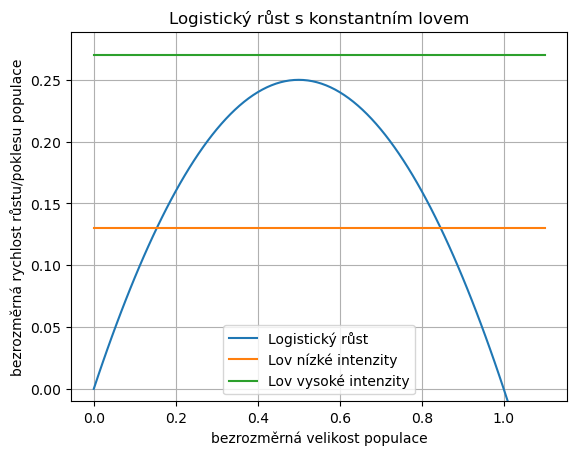

In [4]:
h1,h2 = 0.13,0.27
N = 100
x = np.linspace(0,1.1,N)
def logisticky_rust(x,r=1,K=1,h=0):
    return r*x*(1-x/K)

df = pd.DataFrame(index=x)    

df["Logistický růst"] = logisticky_rust(x)
df["Lov nízké intenzity"] = np.full(N,h1)
df["Lov vysoké intenzity"] = np.full(N,h2)

ax = df.plot()
ax.set(
    title="Logistický růst s konstantním lovem",
    ylim=(-0.01,None),
    xlabel=r"bezrozměrná velikost populace",
    ylabel="bezrozměrná rychlost růstu/poklesu populace",
)
ax.grid()

Grafem funkcí, jejichž rozdíl figuruje na pravé straně rovnice, jsou parabola
řídící růst a vodorovná přímka vyjadřující lov. Změnou intenzity lovu se
vodorovná přímka posunuje nahoru (zvýšení), či dolů (snížení). Pro lov nízkou
intenzitou má přímka s parabolou dva průsečíky a ty se posunují, jak se
vodorovná přímka posunuje nahoru nebo dolů. Pro lov s vysokou intenzitou
průsečíky zaniknou. 

Pro vysoký lov tedy je rozdíl růstu a poklesu záporný a velikost populace klesá
v čase. Tato rychlost poklesu je minimálně tak velká, jako vzdálenost vodorovné
přímky od vrcholu paraboly a proto není možné očekávat, že by se pokles zastavil
tak, že řešení konverguje k vodorovné asymptotě. V této situaci populace
nepřežije a lov ji zlikviduje.

Pro lov nízké intenzity mají křivky růstu a poklesu dva průsečíky. Nalevo od
prvního průsečíku převažuje pokles nad růstem a populace vymře. Napravo od
druhého průsečíku také převažuje pokles nad přírůstkem, populace vymírá, ale
toto vymírání se zastaví ve stacionárním bodě odpovídajícím tomuto průsečíku.
Mezi stacionárními body převažuje růst nad lovem a populace roste. 

Model ukazuje, že pro vysoké hodnoty lovu populace zanikne a pro rozumné hodnoty
lovu přežívá. Toto přežívání je podmíněno tím, že velikost populace na začátku
vývoje není pod nestabilním stacionárním bodem a ani pod něj náhodnými
fluktuacemi neklesne.

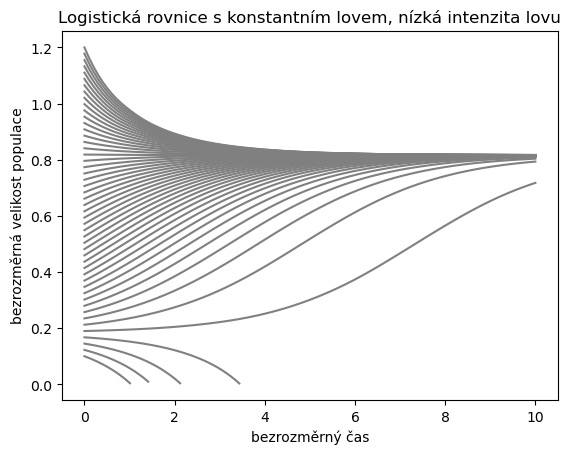

In [5]:
pocatecni_podminka = np.linspace(0.1,1.2,50)
meze = [0,10]
t = np.linspace(*meze,100)

def destrukce_populace(t,x):  # Pokud x klesne na nulu, zastavíme výpočet
    return x
destrukce_populace.terminal = True

def rovnice(t, x, r=1, K=1, h=0.15):
    return r*x*(1-x/K)-h

# Pro různé počáteční podmínky se bude lišit interval, 
# na kterém algoritmus najde řešení. Proto nemůžeme data
# shrnout do jedné tabulky.
reseni = [ solve_ivp(
                   rovnice,
                   meze,
                   [pp],
                   t_eval=t,
                   events=destrukce_populace,
                   )
          for pp in pocatecni_podminka]

fig, ax = plt.subplots(1)
for i in reseni:
    ax.plot(i.t,i.y[0],"gray")
ax.set(
  title="Logistická rovnice s konstantním lovem, nízká intenzita lovu",
  xlabel="bezrozměrný čas",
  ylabel="bezrozměrná velikost populace"
  );

Bifurkační diagram je na obrázku. Pro různé hodnoty parametru je na něm možné najít polohu stacionárních bodů a identifikovat jejich stabilitu. Pro hodnotu $h=0.25$ nastává bifurkace, kdy při zvyšování lovu splývají a zanikají oba stacionární body.

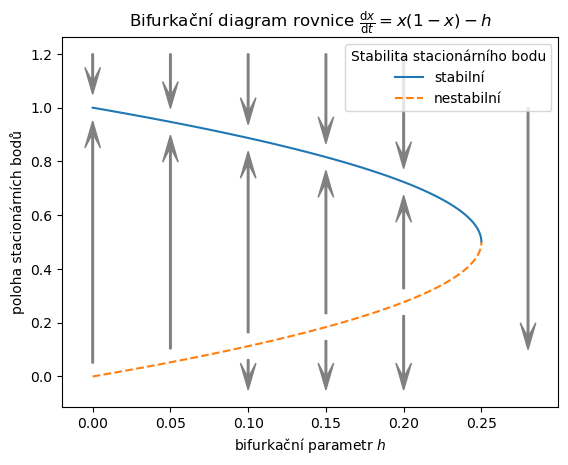

In [6]:
N_stabilni = np.linspace(0.5,1)
N_nestabilni = np.linspace(0,0.5)
for N,typ,popisek in zip(
    [N_stabilni,N_nestabilni],
    ["-","--"],
    ["stabilní","nestabilní"]
    ):
    plt.plot(N*(1-N),N,typ,label=popisek)
for i in [0,0.05,0.10,0.15,0.20]:
    dy=0.05;
    plt.arrow(
        i,0.5-np.sqrt(0.25-i)+dy,
        0,2*np.sqrt(0.25-i)-4*dy,
        lw=1, color="gray", head_width=0.01, head_length = 0.1, overhang=0.5
        )
    plt.arrow(
        i,1.2,
        0,-0.55+np.sqrt(0.25-i),
        lw=1, color="gray", head_width=0.01, head_length = 0.1, overhang=0.5
        )    
for i in [0.1,0.15,0.20]:
    dy=0.05;
    plt.arrow(
        i,0.5-np.sqrt(0.25-i)-dy,
        0,-(0.4-np.sqrt(0.25-i)),
        lw=1, color="gray", head_width=0.01, head_length = 0.1, overhang=0.5
        )    
plt.arrow(
        0.28,1.0,
        0,-0.8,
        lw=1, color="gray", head_width=0.01, head_length = 0.1, overhang=0.5
        )    
ax = plt.gca()
ax.set(
    title=r"Bifurkační diagram rovnice $\frac{\mathrm{d} x}{\mathrm{d}t}=x(1-x)-h$",
    xlabel=r"bifurkační parametr $h$",
    ylabel="poloha stacionárních bodů")
plt.legend(title="Stabilita stacionárního bodu", loc="upper right");

Pro přežívání populace je nutné hlídat, aby populace nikdy neklesla pod
kritickou hodnotu vedoucí k vymření populace. Proto je dobré udržovat hodnotu
lovu na takové úrovni, aby vzdálenost mezi stabilním a nestabilním stacionárním
bodem byla dostatečně velká, aby náhodné perturbace, ke kterým může kdykoliv
dojít, nesnížily velikost populace pod nestabilní práh. V takovém případě při
poklesu populace není nutné měnit strategii lovu, populace drobné fluktuace
vyrovná sama svými přirozenými růstovými mechanismy. 

V praxi je nutno buď uvažovat co největší $h$, abychom měli co největší užitek,
sledovat, zda vlivem výkyvů velikost populace neklesá pod kritickou hodnotu a
pokud ano tak okamžitě měnit rychlost lovu nebo další parametry systému
(podpořit rozmnožování a pod.). Další alternativou je lovit menší rychlostí $h$,
což nese nižší užitek z lovu, ale ponechává populaci možnost, aby se sama
vyrovnala s případnými výkyvy.

Poznamenejme, že v uvedeném modelu má smysl i předpoklad, že
koeficient $h$ je záporný. V takovém případě nemluvíme o záporném
lovu, ale příslušný člen interpretujeme jako rychlost imigrace, se
kterou uvažovaný druh proniká do dané lokality. 

Následující model ukazuje mechanickou představu bifurkace pomocí analogie s
kuličkodráhou. Je vykreslen potenciál (záporně vzatý integrál) pravé strany. Ten
je možno chápat jako potenciální energii a chování systému je možné přirovnat k
chování kuličky pohybující se po kuličkodráze ve stejném tvaru jako je tento
potenciál. Pro malé hodnoty lovu má potenciál lokální minimum a v tomto minimu
existuje stabilní stacionární stav. S rostoucím lovem je minimum stále méně
výrazné a i malá perutbace může kuličku z dolíku vyhodit a kulička se skutálí
pryč. Pro kritický lov $h=0.25$ už lokální minimum zaniká. Pro ještě
intenzivnější lov se celá křivka svažuje doleva a kulička se odkutálí pryč.

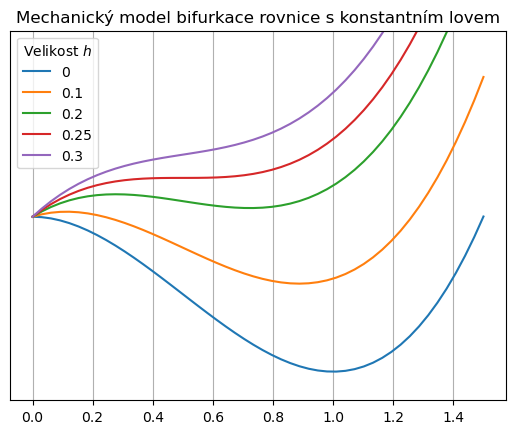

In [7]:
x = np.linspace(0,1.5)

for h in [0,0.1,0.2,0.25,0.3]:
    potencial = - cumulative_trapezoid(x*(1-x)-h, x, initial=0)
    plt.plot(x, potencial, label=h)
    
plt.gca().set(
    ylim=(None,0.2),
    title="Mechanický model bifurkace rovnice s konstantním lovem",
    yticks=[]
)
plt.legend(title="Velikost $h$")
plt.grid()

### Lov úměrný velikosti populace

Uvažujme strategii lovu spočívající v tom, že rychlost, s jakou lovem snižujeme
velikost populace, je úměrná celkové velikosti populace. Malou populaci lovíme
málo, větší populaci více. To by odpovídalo například filtrování, kdy
odstraňujeme bakterie z živného roztoku. 

Matematicky vyjádřeno, populace se vyvíjí podle modelu
$$
 \frac{\mathrm dx}{\mathrm dt}=rx\left(1-\frac xK\right)-qx,
$$
kde $r,q,K$ jsou kladné konstanty. První člen na pravé straně je parabola známá
z logistické rovnice, druhý člen odpovídá přímce procházející počátkem.  

V bezrozměrném tvaru má rovnice podobu 
$$
 \frac{\mathrm dy}{\mathrm d\tau}=y\left(1-y\right)-\alpha y,
$$
kde $y=\frac xK$, $\tau = rt$ a $\alpha=\frac qr.$ Tento tvar vyjadřuje, že v
rovnici je možné bez újmy na obecnosti položit hodnoty invazního parametru a 
nosné kapacity prostředí rovny jedné.

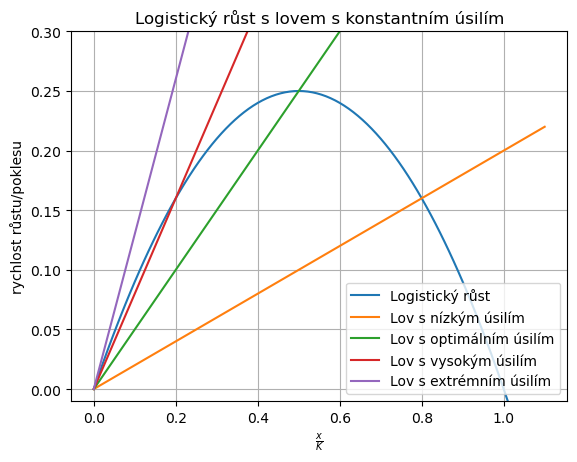

In [8]:
h = 0.2,0.5,0.8,1.3
N = 100
x = np.linspace(0,1.1,N)
def logisticky_rust(x,r=1,K=1,h=0):
    return r*x*(1-x/K)

df = pd.DataFrame(index=x)    

df["Logistický růst"] = logisticky_rust(x)
df["Lov s nízkým úsilím"] = h[0]*x
df["Lov s optimálním úsilím"] = h[1]*x
df["Lov s vysokým úsilím"] = h[2]*x
df["Lov s extrémním úsilím"] = h[3]*x

ax = df.plot()
ax.set(
    title="Logistický růst s lovem s konstantním úsilím",
    ylim=(-0.01,.3),
    xlabel=r"$\frac {x}{K}$",
    ylabel="rychlost růstu/poklesu",
)
ax.grid();

Vidíme, že tato strategie lovu má oproti konstantnímu lovu velkou výhodu: nemá
nestabilní stacionární bod. (S výjimkou extrémně vysoké intenzity lovu, kdy je
směrnice přímky charakterizující lov v bezrozměrných veličinách větší než
jedna.)

Pro praktické provádění této strategie je však nutno znát v každém okamžiku
aktuální velikost populace, což může být obtížně zjistitelné, nebo takřka
nemožné. V takovém případě je vhodnější použít strategii konstantního lovu. V
případě, kdy velikost úlovku je úměrná intenzitě lovu (např. vynaloženému úsilí,
kvalitě loveckých pomůcek a pod.), je naopak snadné realizovat strategii s
proměnnou rychlostí, protože stačí lovit se stále stejnou intenzitou $q$.

V praxi se snažíme užitek z lovu maximalizovat a tedy se snažíme o to, aby
součin $qx$ byl v rovnovážném stavu co největší. To znamená, že přímka
charakterizující lov prochází vrcholem paraboly. Zvýšení úsilí vede ke strmější
přímce, která protíná parabolu níže a celkový užitek z lovu se tedy snižuje. 

Kromě toho je pro *ekonomicky* nejvýhodnější strategii lovu nutno uvažovat, že
většího úlovku dosáhneme jenom za použití většího úsilí. Na toto zvýšení úsilí
je nutno vynaložit větší ekonomické náklady, které snižují celkový zisk. Je tedy
nutno hledat určitou rovnováhu -- chceme odlovit co nejvíce jedinců, abychom
měli co největší zisk, od určité hranice je však již lov drahý a nevyplácí se.
Tato problematika, maximalizace ekonomického profitu, je podrobně rozpracována v
odborné literatuře, zejména na příkladech z rybolovu.


## Populace pod predačním tlakem

```{index} single: Model ; populace pod predačním tlakem
```

Následující model má velký historický význam. Umožnil objasnit, proč v
kanadských lesích dochází periodicky k přemnožování obaleče smrkového. Toto je
motýl, jehož housenky v době přemnožení dokáží zničit obrovské plochy lesa. Na
monitorování situace používala kanadská lesní správa model (Holling, Jones, Clark) obsahující 30 tisíc
proměnných, které sledovaly prostorové rozložení populace a její vývoj v čase.
Model však nedokázal odpovědět na otázku, proč dochází k periodickému
přemnožení. Pokud pochopíme tento proces, budeme schopni mu účinně bránit. 

Na vysvětlení uvedeného problému sestavili Ludwig, Jones a Holling model složený
ze tří diferenciálních rovnic popisujících dynamiku lesa, housenek obaleče a
jejich predátorů, ptáků. My si zde představíme zjednodušení, kdy se budeme
věnovat jenom nejrychleji se měnící populaci, populaci housenek obaleče. Tato
populace bude pod tlakem predátorů, ptáků a malých savců, kteří se housenkami
živí. 

### Matematický model

Předpokládejme, že populace predátorů je stabilizovaná a že přežití predátorů
není závislé na velikosti populace obaleče. To nastane zejména v případech,
kdy má predátor v prostředí i alternativní zdroje potravy a kdy dynamika jeho
populace je pomalejší než dynamika populace obaleče.

Situaci budeme modelovat diferenciální rovnicí
$$
 \frac{ \mathrm dN}{ \mathrm dt}=r\left(1-\frac NK\right)N-V(N),
$$
kde první člen na pravé straně rovnice odpovídá logistickému růstu
obaleče a druhý člen na pravé straně charakterizuje, jak je
vývoj populace zpomalován působením predátorů. Působení predátorů je
charakterizováno následujícími znaky.

* Bez přítomnosti kořisti predátoři nic neuloví, tj. $V(0)=0$.
* Je-li více kořisti, predátoři jí neuloví méně, tj. $V$ je
 neklesající funkce
* Predátoři nemohou ulovit neomezeně mnoho kořisti, ale loví pouze
 do jisté hladiny nasycení, funkce $V$ je proto ohraničená.
* Je-li populace kořisti malá, predátoři ji téměř neloví, ale dávají
  přednost dostupnějším zdrojům potravy, funkce $V$ tedy zpočátku
  roste pomalu.

```{margin} Derivace a průběh funkce

[![](https://user.mendelu.cz/marik/manim/thumbs/Obalec.jpg)](https://user.mendelu.cz/marik/manim/Obalec/)

Model obaleče a jeho predátorů.
```

Ludwig, Jones a Holling navrhli použít pro funkci $V$ trofickou funkci typu
Holling II ve tvaru
$$  V(N)=S\frac {N^2}{N^2+b^2},$$
kde $S$ a $b$ jsou kladné konstanty.
Uvažovanou úlohu poté modeluje rovnice
$$
 \frac{ \mathrm dN}{ \mathrm dt}=r\left(1-\frac NK\right)N-S\frac {N^2}{N^2+b^2}.
$$

### Nondimenzionalizace

Abychom mohli kvalitativně prozkoumat vlastnosti řešení, pokusíme se zavést
bezrozměrné veličiny a tím poněkud zjednodušit pravou stranu rovnice. Budeme se
snažit především eliminovat parametry z trofické funkce, protože tento člen na
pravé straně rovnice je složitější než člen z rovnice logistického růstu.  

Zavedeme novou závisle proměnnou $x$ substitucí $N=bx$.  Biologicky to
znamená, že velikost populace budeme měřit v nových jednotkách, které
jsou $b$-násobkem původních jednotek. Po této substituci má rovnice tvar
$$
  b\frac{ \mathrm dx}{ \mathrm dt}=rb\left(1-\frac {bx}K\right)x-S\frac
  {x^2}{x^2+1}.
$$
 Tuto rovnici je možno dále přepsat do tvaru 
$$  \frac bS \frac{ \mathrm dx}{ \mathrm dt}=\frac {rb}S\left(1-\frac {x}{\tfrac
  Kb}\right)x-\frac
   {x^2}{x^2+1}.
$$
Změníme-li dále jednotky měření času substitucí $\tau=\frac{tS}b$ a
zavedeme nové parametry $\alpha=\frac {rb}S$, $\beta=\frac Kb$, má rovnice
pro vývoj populace tvar
$$    \frac{ \mathrm dx}{ \mathrm d\tau}=\alpha\left(1-\frac {x}{\beta}\right)x-\frac
   {x^2}{x^2+1}.
$$
Jinými slovy, bez újmy na obecnosti můžeme položit hodnoty $S$ a $b$ rovny jedné.
Jedná se tedy o klasickou rovnici pro vývoj jednodruhové populace se
specifickou mírou růstu
$$ \mu(x)=\alpha\left(1-\frac {x}{\beta}\right)-\frac
   {x}{x^2+1}.
$$

### Růstové křivky

Funkci $\frac{x}{x^2+1}$ a přímku $\alpha\left(1-\frac x\beta\right)$ vykreslíme
do jednoho grafu. V závislosti na hodnotách parametrů $\alpha$ a $\beta$ může
vzájemná poloha dopadnout trojím způsobem. Buď se křivky protnou jenom jednou v
bodě, kde je hodnota populace malá. Toto nastane pro malou nosnou kapacitu a
malý invazní parametr. V takovém případě je populace housenek na nízké úrovni.

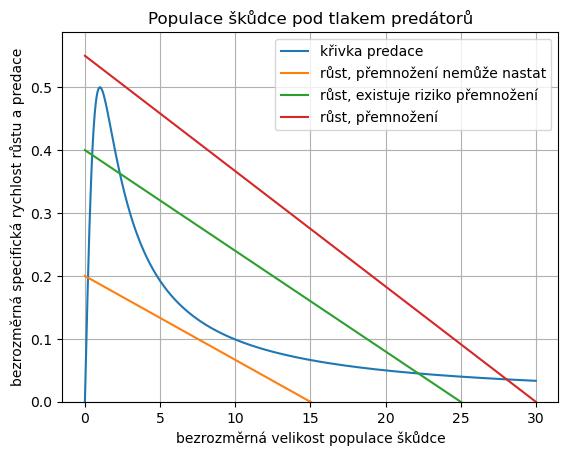

In [9]:
x = np.linspace(0,30,500)
parametry = [[.2,15,"růst, přemnožení nemůže nastat"],
            [.4,25,"růst, existuje riziko přemnožení"],
            [.55,30,"růst, přemnožení"]]

plt.plot(x,x/(1+x**2),label="křivka predace")
for alpha,beta,text in parametry:
    plt.plot(x,alpha*(1-x/beta),label=text)

ax = plt.gca()
ax.set(
    ylim=(0,None),
    xlabel="bezrozměrná velikost populace škůdce",
    ylabel="bezrozměrná specifická rychlost růstu a predace",
    title="Populace škůdce pod tlakem predátorů"
)
plt.grid()
plt.legend();

### Bifurkační diagram

V prostoru parametrů můžeme dokonce najít křivky oddělující existenci jednoho
stacionárního stavu a tří. Vznikne bifurkační diagram ukazující, pro které
hodnoty parametrů jsou možné tři stacionární stavy (dva stabilní a jeden
nestabilní) a pro které hodnoty existuje jenom jeden. Tečky v diagramu
odpovídají přímkám, které jsou v zachyceny na předchozím obrázku. Barvy si
odpovídají, červený bod charakterizuje červenou přímku a podobně.

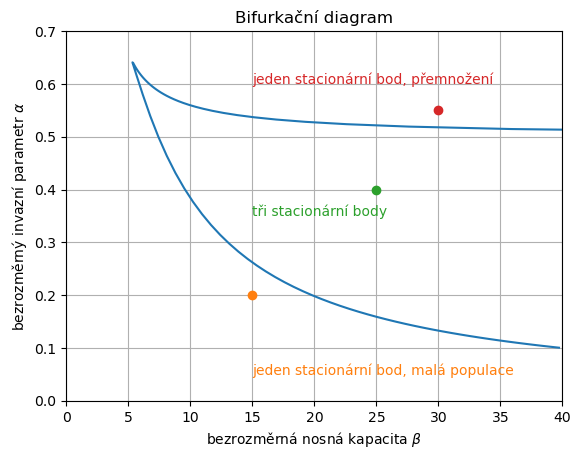

In [10]:
x = np.array([np.linspace(1.01,1.5),np.linspace(1.51,20)]).flatten()
y = x/(x**2+1)
dydx = np.gradient(y,x)
body = np.zeros([len(x),2])
i = 0
for x0,y0,dydx0 in zip(x,y,dydx):
    r = y0 - dydx0*x0  # pruseciky tecny s osami
    K = x0 - y0/dydx0
    body[i,:] = [K,r]
    i = i+1

plt.plot(*body.T)
ax = plt.gca()
for i,j in enumerate(parametry):
    r,K,_ = j
    plt.plot([K],[r],"o", color="C"+str(i+1))
for vyska, popisek, barva in [
        [0.05,"jeden stacionární bod, malá populace","C1"],
        [0.35,"tři stacionární body","C2"],
        [0.6,"jeden stacionární bod, přemnožení","C3"],
        ]:
    ax.text(15,vyska,popisek, color=barva)
ax.set(
    ylim=(0,.7),
    xlim=(0,40),
    xlabel=r"bezrozměrná nosná kapacita $\beta$",
    ylabel=r"bezrozměrný invazní parametr $\alpha$",
    title="Bifurkační diagram"
)
ax.grid();

### Závěr

Model vysvětluje, proč dochází k periodickému přemnožování. Jak les roste,
poskytuje větší nosnou kapacitu prostředí pro obaleče a lepší podmínky pro jeho
množení. Tím se přímky v diagramu srovnávajícím produkci a predaci dostávají
doprava nahoru a z původně jednoho nízkého stacionárního stavu (oranžová přímka)
máme tři stacionární stavy s možností přemnožení a malým prahem mezi prvním a
druhým stacionárním bodem (zelená přímka) a nakonec jeden stacionární stav
znamenající přemnožení. Jakmile k tomuto přemnožení dojde, škůdce zničí les i
své životní prostředí a les začíná růst od začátku. Tyto cykly pozorujeme v
provincii Nový Brunšvik, protože v jiných provinciích dochází k jiným
katastrofám omezujícím růst lesa, například lesní požáry ({cite}`fowler`).

Strategií ochrany lesa je vhodnými opatřeními nedovolit posun parametrů do
oblasti, kde je jeden stacionární bod s vysokou hodnotou populace. V takových
podmínkách totiž je nízká úroveň populace daleko od stabilního stavu a její
udržování je možné pouze za cenu neustálých zásahů a vysokých investic. Po
jakémkoliv jednorázovém zredukování populace se rychle obnovuje rovnováha
odpovídající vysokým hodnotám. Pro účinný zásah je nutné vhodnými opatřeními
zajistit, aby se parametry systému přesunuly do oblasti se třemi stacionárními
body a poté dalším zásahem jednorázově zredukovat populaci. Jakmile populaci
jednou zredukujeme pod hodnotu odpovídající nestabilními stacionárnímu bodu,
bude konvergovat ke stabilnímu stacionárnímu bodu odpovídajícímu malé populaci a
obaleč tedy nebude přemnožen.